# Histograms And Box Plots

In this mission, we'll learn how to **visualize the distributions of user ratings using histograms and box plots**. 

## Dataset 
We'll continue working with the **same dataset** from the last mission, which is available from the [FiveThirtEight Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). We've read the dataset into pandas, selected the columns we're going to work with, and assigned the new Dataframe to norm_reviews.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
print(norm_reviews[:5])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  
0       3.90                   4.5  
1       3.55                   4.5  
2       3.90                   4.5  
3       2.70                   4.5  
4       2.55                   3.0  


## Frequency distributions

A column's frequency distribution consists of the unique values in that column along with the count for each of those values (or their frequency). We can use `Series.value_counts()` to return the frequency distribution as Series object.

### Sort by  frequency

In [26]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
print(freq_counts)

4.1    16
4.2    12
3.9    12
4.3    11
3.7     9
3.5     9
4.5     9
3.4     9
3.6     8
4.4     7
4.0     7
3.2     5
2.9     5
3.8     5
3.3     4
4.6     4
3.0     4
4.8     3
3.1     3
2.8     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64


### Sort by value


In [27]:
sorted_freq_counts = freq_counts.sort_index() 
print(sorted_freq_counts)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64


### Exercise: Compare frequency of Fandango and IMDB

In [28]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = freq_counts.sort_index()
print(fandango_distribution)

imdb_counts = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_counts.sort_index()
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


While we can quickly determine the **minimum and maximum values**, we struggle to answer the following questions about a column:

* What percent of the ratings are contained in the 2.0 to 4.0 range?
 * How does this compare with other sites?
* Which values represent the top 25% of the ratings? The bottom 25%?
 * How does this compare with other sites?

## Histograms

Comparing frequency distributions is also challenging because the Fandango_Ratingvalue column contains 21 unique values while IMDB_norm contains 41 unique values. We need a way to **compare frequencies across a shared set of values**. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values **into a series of fixed length intervals, called bins**. We can then sum the frequencies for the values that fall into each bin. Here's a diagram that makes binning easier to understand:

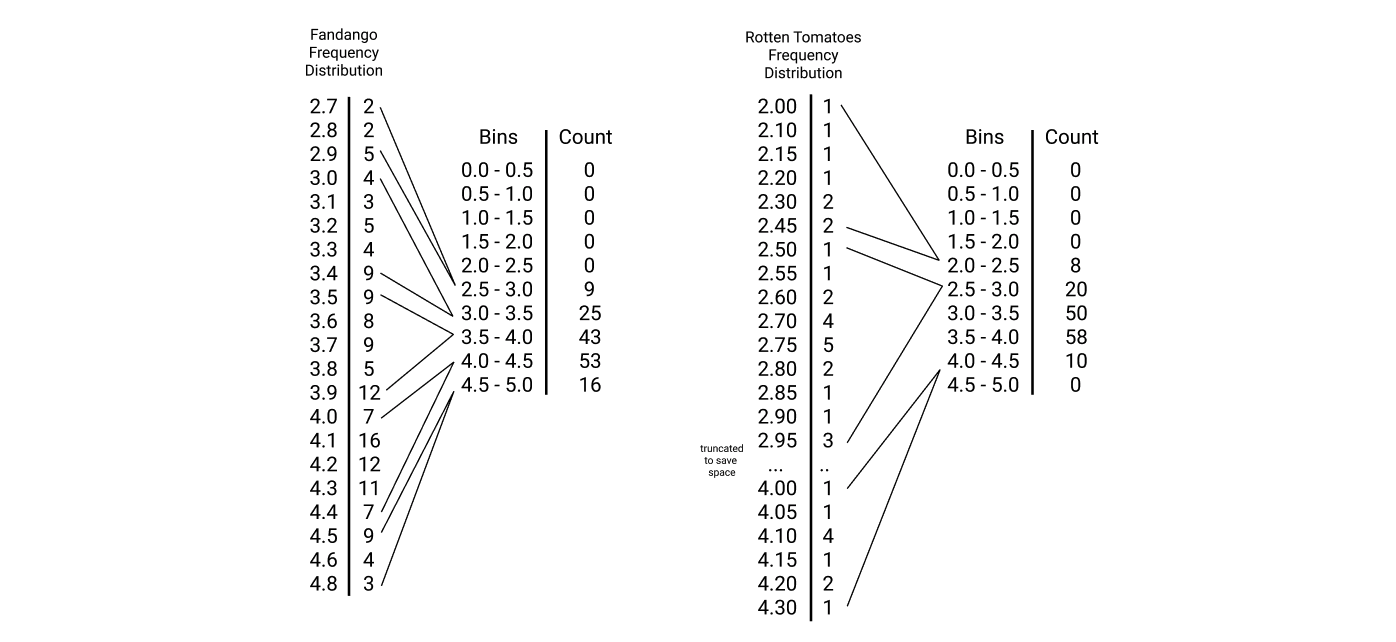

The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. **This type of plot is called a histogram**. Let's dive right into creating a histogram in matplotlib.

We can generate a histogram using `Axes.hist()`. This method has only **1 required parameter**, an iterable object containing the values we want a histogram for. By default, matplotlib will:

* calculate the **minimum and maximum value** from the sequence of values we passed in
* create **10 bins of equal length** that span the range from the minimum to the maximum value
* **group unique values** into the bins
* **sum up** the associated unique values
* **generate a bar** for the frequency sum for each bin


The default behavior of `Axes.hist()` is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a **shared binning strategy**. We can use the range parameter to specify the range we want matplotlib to use as a tuple:

`ax.hist(iterable_object, range=(0, 5))`

### Histograms vs. Barplots
While histograms use bars whose lengths are scaled to the values they're representing, they differ from bar plots in a few ways:
* Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. 
* The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. 
* Bar plots also have gaps between the bars, to emphasize that the values are discrete.





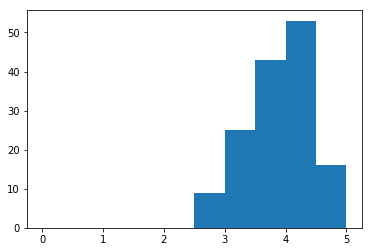

In [29]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0,5))
plt.show()

We can **increase the number of bins** from 10 to 20 for **improved resolution** of the distribution. The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). The bins parameter for `Axes.hist()` is the 2nd positional parameter, but can also be specified as a named parameter:



In [30]:
# both works
ax.hist(norm_reviews['Fandango_Ratingvalue'], 20, range=(0, 5))
ax.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          7.,  12.,  13.,  26.,  17.,  35.,  18.,  13.,   3.]),
 array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ]),
 <a list of 20 Patch objects>)

### Exercise: 
Generate histograms using 20 bins for all four columns. To ensure that the scales for the y-axis are the same for all histograms, let's set them manually using Axes.set_ylim().



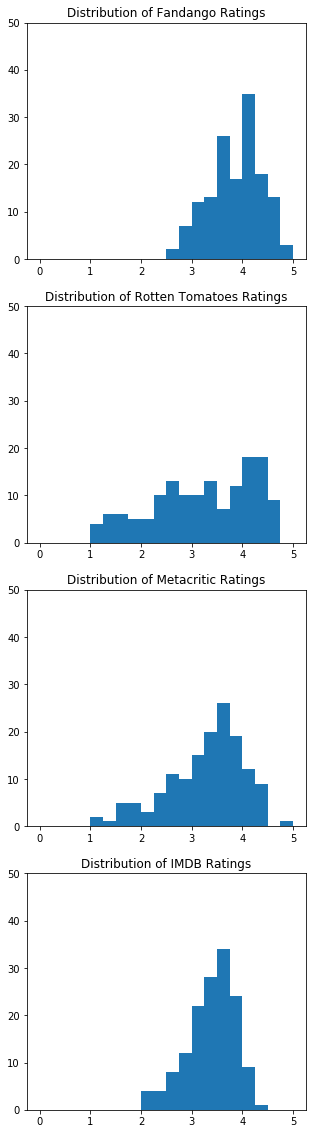

In [31]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)


plt.show()

### Obervations

* Around 50% of user ratings from Fandango fall in the 2 to 4 score range
* Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
* Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
* Around 90% of the user ratings from IMDB fall in the 2 to 4 score range


## Box plots

While histograms allow us to **visually estimate the percentage of ratings** that fall into a range of bins, they don't allow us to easily understand how the **top 25% or the bottom 25%** of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent **quartiles**. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

While these regions may sound similar to bins, they differ in how values are grouped into each region. Each bin covers an equal proportion of the values in the range. On the other hand, each quantile covers an equal number of values (1/4th of the total values). **To visualize quartiles**, we need to use a **box plot**, also referred to as a **box-and-whisker plot**. 

They display **variation in samples of a statistical population** without making any assumptions of the underlying statistical distribution. The spacings between the different parts of the box indicate the degree of **dispersion** (spread) and **skewness** in the data, and **show outliers**. In addition to the points themselves, they allow one to visually estimate various L-estimators, notably the **interquartile range**, midhinge, range, mid-range, and trimean.

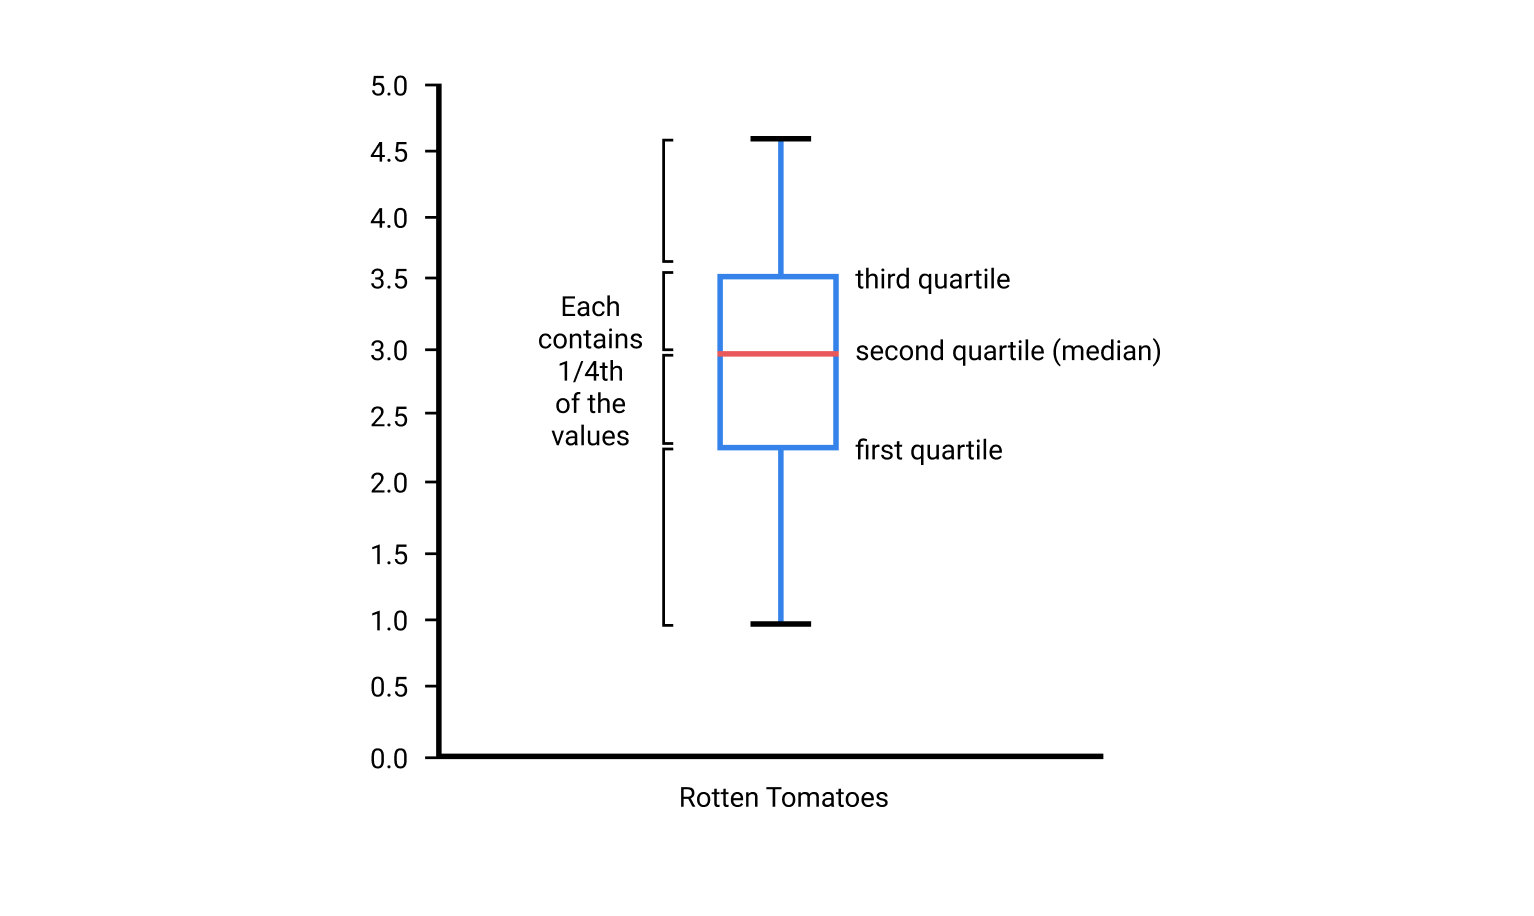

The two regions contained within the box in the middle make up the **interquartile range, or IQR**. The IQR is used to measure dispersion of the values. The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.


### Implementation
We can generate a boxplot using `Axes.boxplot()`.



In [32]:
ax.boxplot(norm_reviews['RT_user_norm'])

{'boxes': [<matplotlib.lines.Line2D at 0x10b9e4710>],
 'caps': [<matplotlib.lines.Line2D at 0x10b9ea048>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b9eacf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10b9eaa20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10b9e48d0>,
  <matplotlib.lines.Line2D at 0x10b9e4ba8>]}

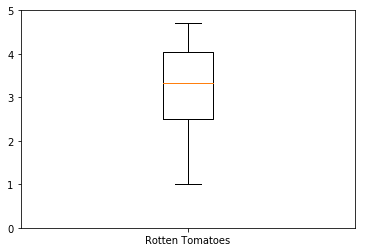

In [40]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0,5)
ax.set_xticklabels(['Rotten Tomatoes'])

plt.show()

**Conclusion**
* the bottom 25% of user ratings range from around 1 to 2.5
* the top 25% of of user ratings range from around 4 to 4.6

To **compare the lower and upper ranges** with those for the other columns, we need to **generate multiple box-and-whisker diagrams in the same box plot**. When selecting multiple columns to pass in to `Axes.boxplot()`, we need to use the **values accessor** to return a **multi-dimensional numpy array**:

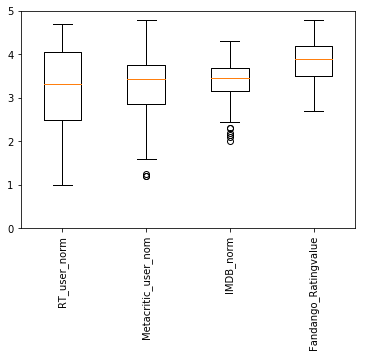

In [44]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()

ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()


**Conclusion**
* user ratings from Rotten Tomatoes and Metacritic **span a larger range of values**
* user ratings from IMDB and Fandango are both **skewed in the positive direction** and span a **more constrained range of values**
* Fandango's median value seems by 0,5 stars higher than the other three

